<a href="https://colab.research.google.com/github/Olimpiamachado/AI_Olimpia/blob/main/method_chainig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro

In [90]:
#Carga conjunto de datos
penguins = sns.load_dataset("penguins")
species = 'Adelie'
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [91]:
data = penguins[penguins['species'] == 'Adelie']['body_mass_g'].dropna()
print(data)

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
147    3475.0
148    3450.0
149    3750.0
150    3700.0
151    4000.0
Name: body_mass_g, Length: 151, dtype: float64


penguins[penguins['species'] == 'Adelie' busca ver si en la columna especies, al igualar a 'adelie' nos da true o false (condición). Comprueba q la columna especie tenga el contendido adelie.

penguins[penguins['species'] == 'Adelie'] solo selecciona las filas donde se da la condición True.

['body_mass_g'] despues de ver donde es true la fila, selecciona solo la columna body mass

.dropna() = elimina los valores nulos.

In [92]:
#Seleccionar la longitud dl pic de la especie 'Gento eliminando los nulos'
gento_bill = penguins[penguins['species'] == 'Gentoo']['bill_length_mm'].dropna()
print(gento_bill)
print(type(gento_bill))

220    46.1
221    50.0
222    48.7
223    50.0
224    47.6
       ... 
338    47.2
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 123, dtype: float64
<class 'pandas.core.series.Series'>


In [93]:
#obtener solo las filas de la especie 'Chinstrap'
chinstrap_data = penguins[penguins['species'] == 'Chinstrap'].dropna()
print(chinstrap_data)

       species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
152  Chinstrap  Dream            46.5           17.9              192.0   
153  Chinstrap  Dream            50.0           19.5              196.0   
154  Chinstrap  Dream            51.3           19.2              193.0   
155  Chinstrap  Dream            45.4           18.7              188.0   
156  Chinstrap  Dream            52.7           19.8              197.0   
..         ...    ...             ...            ...                ...   
215  Chinstrap  Dream            55.8           19.8              207.0   
216  Chinstrap  Dream            43.5           18.1              202.0   
217  Chinstrap  Dream            49.6           18.2              193.0   
218  Chinstrap  Dream            50.8           19.0              210.0   
219  Chinstrap  Dream            50.2           18.7              198.0   

     body_mass_g     sex  
152       3500.0  Female  
153       3900.0    Male  
154       3650.0  

In [94]:
#Seleccionar la masa de los pinguinos q pesen mas de 4000 g
heavy_penguins = penguins[penguins['body_mass_g'] > 4000]
print(heavy_penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
7    Adelie  Torgersen            39.2           19.6              195.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
14   Adelie  Torgersen            34.6           21.1              198.0   
17   Adelie  Torgersen            42.5           20.7              197.0   
19   Adelie  Torgersen            46.0           21.5              194.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
7         4675.0    Male  
9         4250.0     NaN  
14    

In [95]:
#Seleccionar la masa de los pinguinos q pesen mas de 4000 g y que sean hembras
#heavy_female_penguins = penguins[(penguins['body_mass_g'] > 4000) & (penguins['sex'] == 'Female')]
heavy_female_penguins = penguins.query("body_mass_g > 4000 and sex == 'Female'")
print(heavy_female_penguins)

       species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
160  Chinstrap   Dream            46.0           18.9              195.0   
220     Gentoo  Biscoe            46.1           13.2              211.0   
222     Gentoo  Biscoe            48.7           14.1              210.0   
225     Gentoo  Biscoe            46.5           13.5              210.0   
226     Gentoo  Biscoe            45.4           14.6              211.0   
228     Gentoo  Biscoe            43.3           13.4              209.0   
230     Gentoo  Biscoe            40.9           13.7              214.0   
232     Gentoo  Biscoe            45.5           13.7              214.0   
234     Gentoo  Biscoe            45.8           14.6              210.0   
236     Gentoo  Biscoe            42.0           13.5              210.0   
238     Gentoo  Biscoe            46.2           14.5              209.0   
241     Gentoo  Biscoe            45.1           14.5              215.0   
242     Gent

In [96]:
print(type(heavy_female_penguins))

<class 'pandas.core.frame.DataFrame'>


In [97]:
#Métodos encadenados:

heavy_female_penguins = penguins[penguins['species'] == 'Chinstrap'] \
                                .loc [penguins['body_mass_g'] > 3500] \
                                ['body_mass_g'] \
                                .dropna() \
                                .astype(int) \
                                .sort_values(ascending = False) \
                                .head(10)

print(heavy_female_penguins)





189    4800
181    4550
191    4500
197    4450
171    4400
183    4300
199    4300
160    4150
177    4150
218    4100
Name: body_mass_g, dtype: int64


In [98]:
chinstrap_data = penguins.query("species == 'Chinstrap' ")
heavy_chinstrap = chinstrap_data[chinstrap_data["body_mass_g"]> 3500]
body_mass = heavy_chinstrap["body_mass_g"].dropna().astype(int).sort_values(ascending = False)
print(body_mass.head(5))


189    4800
181    4550
191    4500
197    4450
171    4400
Name: body_mass_g, dtype: int64


In [99]:
#Convertir a una lista en python
#lista = gento_bill.to_list()
#Utilizar una conversion directa
lista = list(gento_bill)
print(lista)

[46.1, 50.0, 48.7, 50.0, 47.6, 46.5, 45.4, 46.7, 43.3, 46.8, 40.9, 49.0, 45.5, 48.4, 45.8, 49.3, 42.0, 49.2, 46.2, 48.7, 50.2, 45.1, 46.5, 46.3, 42.9, 46.1, 44.5, 47.8, 48.2, 50.0, 47.3, 42.8, 45.1, 59.6, 49.1, 48.4, 42.6, 44.4, 44.0, 48.7, 42.7, 49.6, 45.3, 49.6, 50.5, 43.6, 45.5, 50.5, 44.9, 45.2, 46.6, 48.5, 45.1, 50.1, 46.5, 45.0, 43.8, 45.5, 43.2, 50.4, 45.3, 46.2, 45.7, 54.3, 45.8, 49.8, 46.2, 49.5, 43.5, 50.7, 47.7, 46.4, 48.2, 46.5, 46.4, 48.6, 47.5, 51.1, 45.2, 45.2, 49.1, 52.5, 47.4, 50.0, 44.9, 50.8, 43.4, 51.3, 47.5, 52.1, 47.5, 52.2, 45.5, 49.5, 44.5, 50.8, 49.4, 46.9, 48.4, 51.1, 48.5, 55.9, 47.2, 49.1, 47.3, 46.8, 41.7, 53.4, 43.3, 48.1, 50.5, 49.8, 43.5, 51.5, 46.2, 55.1, 44.5, 48.8, 47.2, 46.8, 50.4, 45.2, 49.9]


In [100]:
#Convertir a arreglo de numpy
import numpy as np
arreglo = gento_bill.to_numpy()
print(arreglo)

[46.1 50.  48.7 50.  47.6 46.5 45.4 46.7 43.3 46.8 40.9 49.  45.5 48.4
 45.8 49.3 42.  49.2 46.2 48.7 50.2 45.1 46.5 46.3 42.9 46.1 44.5 47.8
 48.2 50.  47.3 42.8 45.1 59.6 49.1 48.4 42.6 44.4 44.  48.7 42.7 49.6
 45.3 49.6 50.5 43.6 45.5 50.5 44.9 45.2 46.6 48.5 45.1 50.1 46.5 45.
 43.8 45.5 43.2 50.4 45.3 46.2 45.7 54.3 45.8 49.8 46.2 49.5 43.5 50.7
 47.7 46.4 48.2 46.5 46.4 48.6 47.5 51.1 45.2 45.2 49.1 52.5 47.4 50.
 44.9 50.8 43.4 51.3 47.5 52.1 47.5 52.2 45.5 49.5 44.5 50.8 49.4 46.9
 48.4 51.1 48.5 55.9 47.2 49.1 47.3 46.8 41.7 53.4 43.3 48.1 50.5 49.8
 43.5 51.5 46.2 55.1 44.5 48.8 47.2 46.8 50.4 45.2 49.9]


In [101]:
#Estructuras de datos en pandas
#pd.series (Series)
import pandas as pd
serie = pd.Series([1, 2, 3, 4, 5])
print(serie)

0    1
1    2
2    3
3    4
4    5
dtype: int64


In [102]:
#pd.Dataframe ( DataFrame)
data = {
    'Nombre': ['Juan', 'María', 'Pedro', 'Ana'],
    'Edad': [25, 30, 35, 40],
    'Ciudad': ['Madrid', 'Barcelona', 'Valencia', 'Sevilla']
}
df = pd.DataFrame(data)
print(df)

  Nombre  Edad     Ciudad
0   Juan    25     Madrid
1  María    30  Barcelona
2  Pedro    35   Valencia
3    Ana    40    Sevilla


In [103]:
#pd.index (index)
print(df.index)

RangeIndex(start=0, stop=4, step=1)


In [104]:
#pd.MultiIndex
arrays = [
    ['España', 'Francia', 'Francia', 'Alemania', 'Alemania'],
    ['Madrid',  'París', 'Lyon', 'Berlín', 'Munich']
]

multi_index =  pd.MultiIndex.from_arrays(arrays, names=('País', 'Ciudad'))
print(multi_index)

MultiIndex([(  'España', 'Madrid'),
            ( 'Francia',  'París'),
            ( 'Francia',   'Lyon'),
            ('Alemania', 'Berlín'),
            ('Alemania', 'Munich')],
           names=['País', 'Ciudad'])


In [105]:
#pd.Categorical (categoría)
categorias = pd.Categorical(['bajo','medio','alto','medio', 'alto'])
print(categorias)

['bajo', 'medio', 'alto', 'medio', 'alto']
Categories (3, object): ['alto', 'bajo', 'medio']


In [106]:
#pd.Interval (Intervalo)
intervalo = pd.Interval(left=10, right=20, closed='right')
print(intervalo)
#Ejercicio práctico:
data = {'paciente': ['Ana', 'Luis', 'Maria', 'Pedro', 'Sofia'],
        'glucosa': [85, 110, 130, 95, 100]}
df = pd.DataFrame(data)
intervalos = [pd.Interval(left = 70, right = 99, closed = 'both'),
              pd.Interval(left=100, right=125, closed='both'),
              pd.Interval(left= 126, right=float('inf'), closed = 'both')]

etiquetas = ['Normal', 'Pre-diabetes', 'Diabetes']
def clasificar_glucosa(glucosa):
    for intervalo, categoria in zip(intervalos, etiquetas):
        if glucosa in intervalo:
            return categoria
    return 'Desconocida'

df['categoria_glucosa'] = df['glucosa'].apply(clasificar_glucosa)
print(df)

(10, 20]
  paciente  glucosa categoria_glucosa
0      Ana       85            Normal
1     Luis      110      Pre-diabetes
2    Maria      130          Diabetes
3    Pedro       95            Normal
4    Sofia      100      Pre-diabetes


In [107]:
#pf.Sparse
from pandas.arrays import SparseArray
sparse_array = SparseArray([1, 2, 3, 4, 5, 0, 0, 6])
print(sparse_array)

[1, 2, 3, 4, 5, 0, 0, 6]
Fill: 0
IntIndex
Indices: array([0, 1, 2, 3, 4, 7], dtype=int32)



# **EJERCICIO DISTRIBUCIÓN PROBABILIDAD PENGUINS OTRA FORMA**

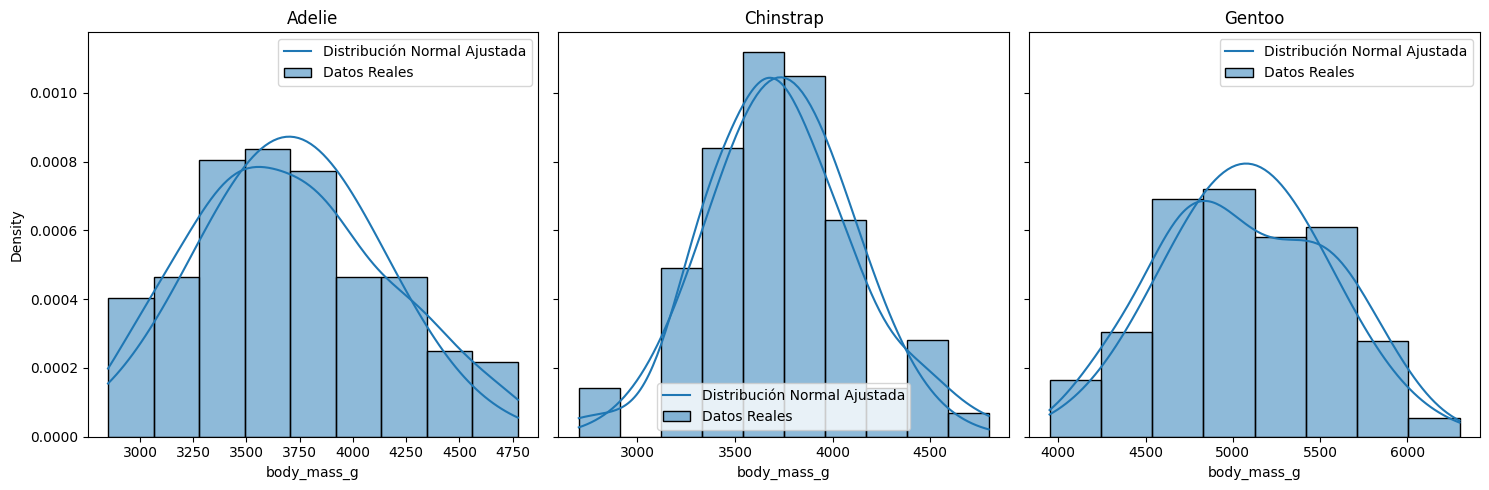

In [113]:
#EJERCICIO DISTRIBUCIÓN PROBABILIDAD PENGUINS VERSION MEJORADA
penguins = sns.load_dataset("penguins")
#1 Ajusta una distribución normal a la variable body_mass_g para cada especie.
#Agrupar por especie y aplicar análisis en una sola pasada

#Crear subplots para todas las especies
especies = penguins['species'].unique()
fig, axes = plt.subplots(1, len(especies), figsize=(15, 5), sharey=True)


resultado = []
for i, (especie, grupo) in enumerate(penguins.groupby('species')):  #Usamos .groupby
    #Filtrar y limpiar la columna 'body_mass_g'
    data = grupo['body_mass_g'].dropna()
    mean, std = norm.fit(data)

    #Crear histograma y distribuión ajustada:
    sns.histplot(data, kde=True, stat ='density', ax = axes[i], label=f'Datos Reales')
    x = np.linspace(data.min(), data.max(), 100)

    axes[i].plot(x, norm.pdf(x, mean, std), label='Distribución Normal Ajustada')
    #plt.title(f'Distribución de Masa Corporal para {especie}')
    #Personalizar el gráfico
    axes[i].set_title(f'{especie}')
    axes[i].legend()
    #plt.show()

plt.tight_layout()
plt.show()
